In [1]:
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt
import mpld3

In [2]:
first = date(2021, 12, 5)
today = date.today()

df_all = pd.DataFrame(columns = ['date', 'cases_0_9', 'cases_10_19'])

curr = first

while (curr <= today):
    
    file_path = "../data/" + curr.isoformat() + ".csv"
    df_curr = pd.read_csv(file_path, index_col = 0)
    df_all = df_all.append({'date': curr.isoformat(), 'cases_0_9': df_curr.iloc[0,1], 'cases_10_19': df_curr.iloc[1,1]}, ignore_index = True)
    curr = curr + timedelta(days = 1)

In [3]:
# cron job picked up previous day's data on two dates: 2021-12-08 and 2021-12-16
# these correspond to indices 3 and 11 of df_0_9
# remove these two rows from df
# then reset the index i.e. re-number each row

df_all.drop([3, 11], inplace = True)
df_all.reset_index(drop = True, inplace = True)

In [4]:
# convert to datetime64 format so the plot doesn't mash all the axis labels together

df_all['date'] = pd.to_datetime(df_all['date'])

# reformat dates to show "day/month", but not year
# this puts them back into a string (object) format

df_all['date'] = df_all['date'].dt.strftime("%d %b")

In [5]:
df_all

,date,cases_0_9,cases_10_19
0,05 Dec,51,64
1,06 Dec,42,56
2,07 Dec,36,42
3,09 Dec,51,83
4,10 Dec,68,54
5,11 Dec,77,70
6,12 Dec,53,74
7,13 Dec,59,74
8,14 Dec,65,75
9,15 Dec,67,120


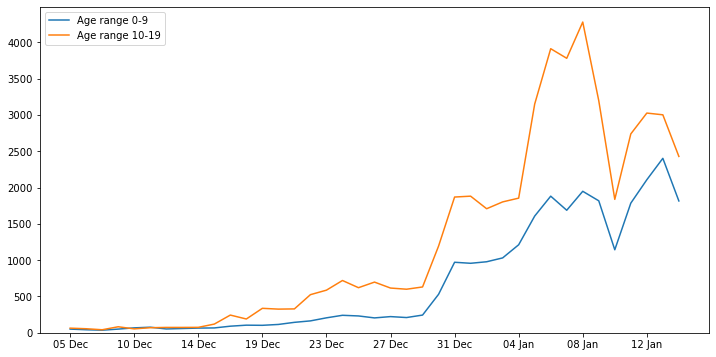

In [6]:
fig = plt.figure(figsize = (12, 6))

# plot both age ranges on same axes
lines1 = plt.plot(df_all['date'], df_all['cases_0_9'], label = "Age range 0-9")
lines2 = plt.plot(df_all['date'], df_all['cases_10_19'], label = "Age range 10-19")

# ensure y = 0 is at origin, not above it
plt.ylim(ymin=0)

# add legend
plt.legend()

# set xtick locations to prevent crowding of x-axis labels
# 1. set step size by dividing num rows by arbitrary number (I decided that 9 looks good for the size of graph)
# 2. step through the rows by step size, adding row locations (i.e. indices) to a list
# 3. only the dates corresponding to those locations will appear on the graph

xtick_locations = []
num_rows = df_all.shape[0]
xtick_step = num_rows//9

position = 0
while (position < num_rows):
     xtick_locations.append(position)
     position = position + xtick_step

plt.xticks(xtick_locations)

# save image
plt.savefig("../images/cases_0_19.svg")

plt.show()

In [ ]:
# mpld3.plugins.connect(fig, mpld3.plugins.PointHTMLTooltip(lines1))
# mpld3.save_html(fig, "../cases_0_9.html")
# mpld3.display()